# PARA-ATM demonstration

This demonstration will illustrate:
1. Using PARA-ATM to read in trajectory data
2. Inspecting and plotting the trajectory data
3. Using PARA-ATM to interface with the GNATS simulation

## Installation

Installation of the `paraatm` Python package is detailed on the [GitHub](https://github.com/ymlasu/para-atm) page.  In most cases, the steps are as simple as downloading ("cloning") the source code and then running:
```
python setup.py install
```
or
```
python setup.py develop
```

This will automatically bring in any needed dependencies, such as `numpy` or `scipy`.

## Working with trajectory data

First, we will use PARA-ATM to read in flight trajectory data from an Integrated Flight Format (IFF) file with the [`read_iff_file`](https://para-atm.readthedocs.io/en/latest/src/io.html#paraatm.io.iff.read_iff_file) function:

In [1]:
from paraatm.io.iff import read_iff_file

data = read_iff_file('IFF_SFO_ASDEX_ABC123.csv')

Let's take a look at what information is available in the data that we read:

In [2]:
print('Number of trajectory points:', len(data))
print('Columns:\n', data.columns)

Number of trajectory points: 723
Columns:
 Index(['recType', 'time', 'fltKey', 'bcnCode', 'cid', 'Source', 'msgType',
       'callsign', 'recTypeCat', 'latitude', 'longitude', 'altitude',
       'significance', 'coord1Accur', 'coord2Accur', 'altAccur', 'tas',
       'heading', 'rocd', 'altQualifier', 'altIndicator', 'trackPtStatus',
       'leaderDir', 'scratchPad', 'msawInhibitInd', 'assignedAltString',
       'controllingFac', 'controllingSeg', 'receivingFac', 'receivingSec',
       'activeContr', 'primaryContr', 'kybrdSubset', 'kybrdSymbol', 'adsCode',
       'opsType', 'airportCode', 'trackNumber', 'tptReturnType', 'modeSCode'],
      dtype='object')


Let's create a simple plot of two of the variables from the data set:

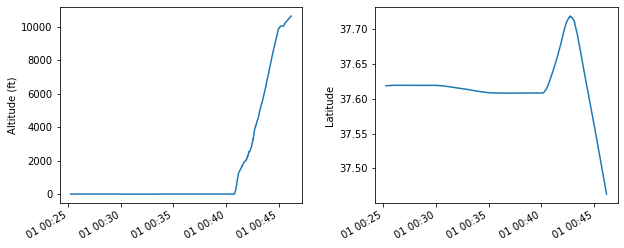

In [3]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,2, figsize=[10,4])
axes[0].plot(data['time'], data['altitude'])
axes[0].set_ylabel('Altitude (ft)')
axes[1].plot(data['time'], data['latitude'])
axes[1].set_ylabel('Latitude')
f.subplots_adjust(wspace=.3)
f.autofmt_xdate()

Now we will use PARA-ATM to make a plot of the trajectory (note, interactive trajectory plot will not display if viewing the notebook online in GitHub):

In [4]:
from paraatm.plotting import plot_trajectory

plot_trajectory(data, output_notebook=True, plot_width=600, plot_height=400)

Loading BokehJS ...

Lastly, we take a look at a data set with multiple aircraft for ground operations around SFO.

In [5]:
from paraatm.io.utils import read_csv_file


data = read_csv_file('IFF_SFO_window.csv')
plot_trajectory(data, output_notebook=True, plot_width=600, plot_height=400)

Loading BokehJS ...

PARA-ATM provides a safety function for ground operations based on the Solution Space Diagram (SSD, [Balasooriyan, 2017](http://resolver.tudelft.nl/uuid:cf361aff-a7ec-444c-940a-d711e076d108)).  Here we compute the ground SSD safety metric for the trajectory data and plot each aircraft's "flight plan flexibility" vs. time:

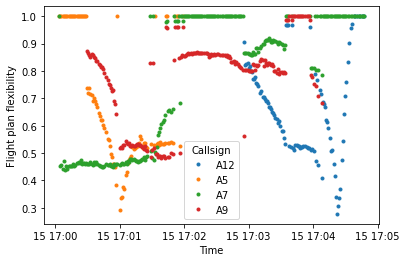

In [6]:
from paraatm.safety.ground_ssd import ground_ssd_safety_analysis

safety = ground_ssd_safety_analysis(data)

f, ax = plt.subplots()
for name, group in safety.groupby('callsign'):
    ax.plot(group['time'], group['fpf'], '.', label=name)
ax.set_xlabel('Time')
ax.set_ylabel('Flight plan flexibility')
ax.legend(title='Callsign');

## GNATS

This section will demonstrate how to run a GNATS simulation using PARA-ATM.

First, we import the user-defined simulation model stored in [gnats_gate_to_gate.py](gnats_gate_to_gate.py), which has been written using the PARA-ATM interface in:

In [7]:
from gnats_gate_to_gate import GateToGate

And create an instance of the simulation class:

In [8]:
sim = GateToGate()

Now, we can use PARA-ATM to automate the process of running GNATS, writing the GNATS output file, and reading it back in automatically.  The PARA-ATM interface to GNATS behaves like a function, so that user-defined input parameters can be passed as inputs, and the simulated trajectory data are returned as an output.  This facilitiates incorporation of the GNATS simulation into parametric studies for sensitivity analysis, uncertainty analysis, probabilistic analysis, etc.

In [9]:
data = sim(pushback_clearance_delay=10)['trajectory']

Let's inspect the trajectory data that were generated:

In [10]:
print('Number of trajectory points:', len(data))
print('Columns:\n', data.columns)

Number of trajectory points: 218
Columns:
 Index(['time', 'latitude', 'longitude', 'altitude', 'rocd', 'tas',
       'tas_knots_ground', 'heading', 'fpa', 'status', 'callsign', 'origin',
       'destination'],
      dtype='object')


Finally, we use PARA-ATM to plot the trajectory data:

In [11]:
plot_trajectory(data, output_notebook=True, plot_width=600, plot_height=400)

Loading BokehJS ...